In [1]:
import torch.nn as nn
import torch.optim as optim

from src.dataset import PosterDataset
from src.train import train, test
from src.model import BinaryCNN
from src.utils import split_data

Using device: mps


In [2]:
BATCH_SIZE = 32
TRAIN_SIZE = 0.8
EPOCHS = 10
LEARNING_RATE = 0.001

In [3]:
dataset = PosterDataset(root_dir="data")
train_loader, val_loader, test_loader = split_data(dataset, batch_size=32, train_size=0.8)

Using default transform
Train      Val        Test      
8000       1000       1000      
250        32         32        


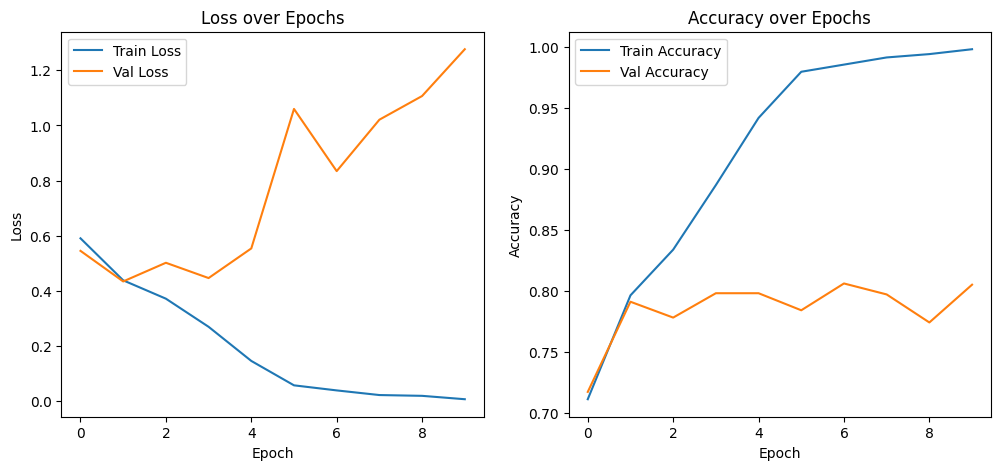

Epoch 10/10
  Train Loss: 0.0077, Train Acc: 0.9982
  Val   Loss: 1.2765, Val   Acc: 0.8050
  Best Val Acc: 0.8060 at Epoch 7
  Learning Rate: 0.001000


In [4]:
model = BinaryCNN()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

history = train(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    epochs=EPOCHS
)

In [7]:
from tabulate import tabulate

# assume `history` is already in your namespace
headers = ["Epoch", "Train Loss", "Val Loss", "Train Acc", "Val Acc"]
table = []
for i, (tl, vl, ta, va) in enumerate(zip(
        history["train_loss"],
        history["val_loss"],
        history["train_acc"],
        history["val_acc"]), start=1):
    mark = "*" if i == history["best_epoch"] else ""
    table.append([
        f"{i}{mark}",
        f"{tl:.4f}",
        f"{vl:.4f}",
        f"{ta:.4f}",
        f"{va:.4f}"
    ])

print(tabulate(table, headers=headers, tablefmt="github"))
print(f"\nBest val acc: {history['best_val_acc']:.4f} (Epoch {history['best_epoch']})")
print(f"Saved model: {history['model_path']}")

| Epoch   |   Train Loss |   Val Loss |   Train Acc |   Val Acc |
|---------|--------------|------------|-------------|-----------|
| 1       |       0.591  |     0.5455 |      0.711  |     0.717 |
| 2       |       0.4387 |     0.4347 |      0.7963 |     0.791 |
| 3       |       0.3722 |     0.5023 |      0.8337 |     0.778 |
| 4       |       0.2702 |     0.4469 |      0.8868 |     0.798 |
| 5       |       0.1465 |     0.5544 |      0.9419 |     0.798 |
| 6       |       0.058  |     1.0601 |      0.9798 |     0.784 |
| 7*      |       0.0396 |     0.8346 |      0.9856 |     0.806 |
| 8       |       0.0228 |     1.021  |      0.9915 |     0.797 |
| 9       |       0.0199 |     1.1069 |      0.9942 |     0.774 |
| 10      |       0.0077 |     1.2765 |      0.9982 |     0.805 |

Best val acc: 0.8060 (Epoch 7)
Saved model: models/run_1/best_model.pth


In [5]:
# model = BinaryCNN()
# model.load_state_dict(torch.load(history["model_path"]))
test(
    model=model,
    test_loader=test_loader,
    criterion=criterion
)

Test Loss: 1.3645, Test Accuracy: 0.7930


(1.3644607062339782, 0.793)